In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

currentDir = os.getcwd()
currentFileCSV2021 = currentDir +"\\" + "batpitch2021.csv"
# csvFileObj = open(currentFileCSV)
batpitch2021 = pd.read_csv(currentFileCSV2021)
currentFileCSV2019 = currentDir +"\\" + "batpitch2019.csv"
batpitch2019 = pd.read_csv(currentFileCSV2019)

def f_z_norm(data):
    mean = np.mean(data)
    std = np.std(data)
    z_norm = [(y-mean)/std for y in data]
    return z_norm

batpitch2021.head()

,Tm,Team,Bat,Pitch,Rank
0,Arizona Diamondbacks,ARI,4.19,5.51,1
1,Atlanta Braves,ATL,4.91,4.07,11
2,Baltimore Orioles,BAL,4.07,5.90,1
3,Boston Red Sox,BOS,5.12,4.62,12
4,Chicago Cubs,CHC,4.35,5.18,5


In [2]:
batpitch2021['z_Bat'] = f_z_norm(batpitch2021['Bat']) 
batpitch2021['z_Pitch'] = f_z_norm(batpitch2021['Pitch']) 

batpitch2021.head()


,Tm,Team,Bat,Pitch,Rank,z_Bat,z_Pitch
0,Arizona Diamondbacks,ARI,4.19,5.51,1,-0.799136,1.760262
1,Atlanta Braves,ATL,4.91,4.07,11,0.888189,-0.827126
2,Baltimore Orioles,BAL,4.07,5.90,1,-1.080356,2.461013
3,Boston Red Sox,BOS,5.12,4.62,12,1.380325,0.161113
4,Chicago Cubs,CHC,4.35,5.18,5,-0.424175,1.167319


In [3]:
print(batpitch2021.loc[0,'Team'], batpitch2021.loc[0,'Rank'] )

for i in range(0,30):
    if batpitch2021.loc[i,'Team'] == "ARI":
        print("ARI :", i)


ARI 1
ARI : 0


************************************************************
     In 2021, analyze Pitching and Batting impact on MLB by BGD 
************************************************************
mX shape:  (3, 30)
------------------------------------------------------------
{ learning rate :  0.1  step : 80 ** error :  -0.00011178995711278204 ## W :  [[4.15516721 4.14194799 3.74941427]]  ### MSE :  47.3926160772966  }
------------------------------------------------------------
{ learning rate :  0.01  step : 845 ** error :  -0.00010107658682133468 ## W :  [[3.90037934 4.33623923 4.13351054]]  ### MSE :  52.98031870105385  }
------------------------------------------------------------
{ learning rate :  0.001  step : 4999 ** error :  -0.008334340880901141 ## W :  [[3.82783814 4.43084034 4.17558109]]  ### MSE :  53.78871588831104  }
------------------------------------------------------------
{ learning rate :  0.0001  step : 4999 ** error :  -2.2849640914478893 ## W :  [[2.29757391 1.82901812 

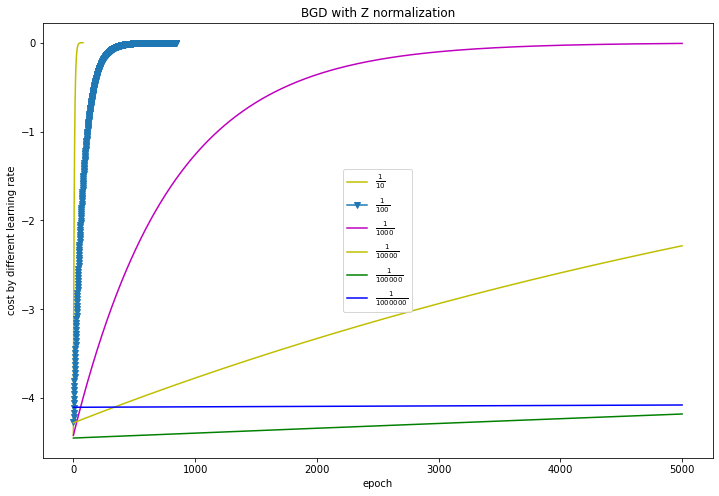

Text(0.5, 1.0, 'BGD with Z normalization')

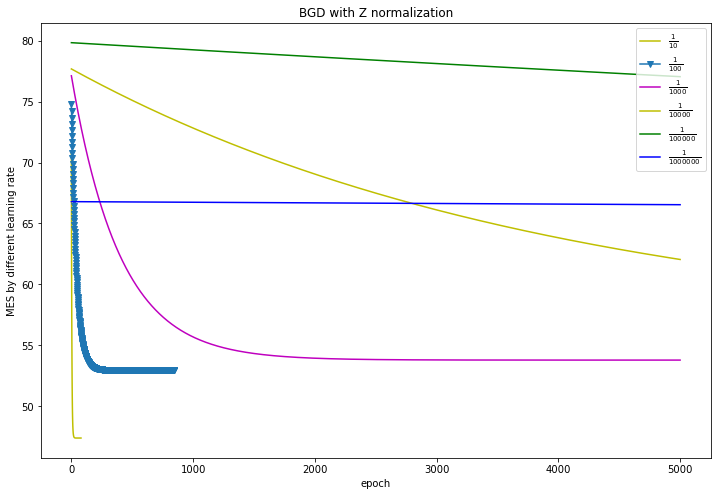

In [4]:
import math
print("*" * 60 )
print("     In 2021, analyze Pitching and Batting impact on MLB by BGD ") 
print("*" * 60 )
epoch = 5000
l_rate = [10**-1, 10**-2, 10**-3, 10**-4, 10**-5, 10**-6]
t_errors0 = []
t_errors1 = []
t_errors2 = []
t_errors3 = []
t_errors4 = []
t_errors5 = []
t_errors6 = []
t_errors7 = []

t_MSE0 = []
t_MSE1 = []
t_MSE2 = []
t_MSE3 = []
t_MSE4 = []
t_MSE5 = []
t_MSE6 = []
t_MSE7 = []


X = np.array([
batpitch2021['z_Bat'],
batpitch2021['z_Pitch']
])
Y = np.array(batpitch2021['Rank'])

mX = np.concatenate((np.ones((1,30)),X),axis=0)
print("mX shape: ", mX.shape )

for l_num in (0,1,2,3,4,5):
    t_error = []
## not theta W gonna be 19
    W = np.random.rand(1,3)
    
    for step in range(epoch):
        hat_y = np.dot(W, mX)
        diff = hat_y - Y
        #MSE
        MSE = (diff**2).mean()
        
        t_error = 2*(diff*mX).mean()

        if abs(t_error) < 0.0001 or math.isinf(t_error) or math.isnan(t_error) :
#        if abs(t_error) < 0.0001 or math.isinf(t_error) :
            t_error = backup
            break 

        W = W - l_rate[l_num] * t_error

        if l_num == 0:
            t_errors0.append(t_error)
            t_MSE0.append(MSE)
        elif l_num == 1:
            t_errors1.append(t_error)
            t_MSE1.append(MSE)
        elif l_num == 2:
            t_errors2.append(t_error)
            t_MSE2.append(MSE)
        elif l_num == 3:
            t_errors3.append(t_error)
            t_MSE3.append(MSE)
        elif l_num == 4:
            t_errors4.append(t_error)
            t_MSE4.append(MSE)
        else:
            t_errors5.append(t_error)
            t_MSE5.append(MSE)
        
        backup = t_error
        
        # if step % 200 == 0 :
        #         print("{ learning rate : ", l_rate[l_num] , " step :" , step, "** error : " , t_error,  "## W : " , W , " ### MSE : " , MSE,  " }") 

    print("----" * 15)
    print("{ learning rate : ", l_rate[l_num] , " step :" , step, "** error : " , t_error,  "## W : " , W ,  " ### MSE : " , MSE, " }") 
    print("====" * 15)

plt.figure(figsize=(12,8))
# plt.ylim([-1, 1])
plt.plot(t_errors0 , 'y-')
plt.plot(t_errors1 , 'v-')
plt.plot(t_errors2 , 'm-')
plt.plot(t_errors3 , 'y-')
plt.plot(t_errors4 , 'g-')
plt.plot(t_errors5 , 'b-')
plt.legend([r'$\frac{1}{10}$',r'$\frac{1}{100}$',r'$\frac{1}{1000}$',r'$\frac{1}{10000}$',r'$\frac{1}{100000}$',r'$\frac{1}{1000000}$'])
plt.xlabel('epoch')
plt.ylabel('cost by different learning rate')
plt.title('BGD with Z normalization')

plt.show()

plt.figure(figsize=(12,8))
#plt.ylim([0, 3])
plt.plot(t_MSE0 , 'y-')
plt.plot(t_MSE1 , 'v-')
plt.plot(t_MSE2 , 'm-')
plt.plot(t_MSE3 , 'y-')
plt.plot(t_MSE4 , 'g-')
plt.plot(t_MSE5 , 'b-')
plt.legend([r'$\frac{1}{10}$',r'$\frac{1}{100}$',r'$\frac{1}{1000}$',r'$\frac{1}{10000}$',r'$\frac{1}{100000}$',r'$\frac{1}{1000000}$'])
plt.xlabel('epoch')
plt.ylabel('MES by different learning rate')
plt.title('BGD with Z normalization')


In [5]:
# We know that Pitching is more important than Batting in 2021 by BGD. Pitching 54%, Batting 46%. 
# If we apply the winning rate with this for 50%, Pitching (Run allowed on game) will be 27%, Batting (Run on game) will be 23%
# Now we're ready to make winning rate matrix. 

In [6]:
ALmatchingCSV2021 = currentDir +"\\" + "ALmatching2021.csv"
ALmat_data2021 = pd.read_csv(ALmatchingCSV2021)
NLmatchingCSV2021 = currentDir +"\\" + "NLmatching2021.csv"
NLmat_data2021 = pd.read_csv(NLmatchingCSV2021)

ALmatchingCSV2019 = currentDir +"\\" + "ALmatching2019.csv"
ALmat_data2019 = pd.read_csv(ALmatchingCSV2019)
NLmatchingCSV2019 = currentDir +"\\" + "NLmatching2019.csv"
NLmat_data2019 = pd.read_csv(NLmatchingCSV2019)

# ALmat_data2021.head()
NLmat_data2019.head()


,Tm,ATL19,MIA19,NYM19,PHI19,WSN19,CHC19,CIN19,MIL19,PIT19,STL19,ARI19,COL19,LAD19,SDP19,SFG19
0,ATL19,--,15,11,9,11,5,3,3,5,4,3,3,2,5,5
1,MIA19,4,--,6,10,4,1,1,2,3,3,4,2,1,4,3
2,NYM19,8,13,--,7,12,2,4,1,5,2,5,4,2,3,3
3,PHI19,10,9,12,--,5,5,4,3,4,4,2,4,2,3,3
4,WSN19,8,15,7,14,--,4,5,2,4,2,3,4,3,3,5


In [300]:
def find_rank(team):
    # print("chk :", team[-2:] , " and " , team[0:3]) 
    for i in range(0,30):
        for j in range(0,31):
            if team[-2:] == '21':
                if batpitch2021.loc[j,'Team'] == team[0:3]:
                    return batpitch2021.loc[j,'Rank'], batpitch2021.loc[j,'Bat'], batpitch2021.loc[j,'Pitch']    
            else :
                if batpitch2019.loc[j,'Team'] == team[0:3]:
                    return batpitch2019.loc[j,'Rank'], batpitch2019.loc[j,'Bat'], batpitch2019.loc[j,'Pitch']    


NLlist = ['ATL','MIA','NYM','PHI','WSN','CHC','CIN','MIL','PIT','STL','ARI','COL','LAD','SDP','SFG']
ALlist = ['BAL','BOS','NYY','TBR','TOR','CHW','CLE','DET','KCR','MIN','HOU','LAA','OAK','SEA','TEX']
print(ALmat_data2021)
print(NLmat_data2021)
# for row_index, row in ALmat_data.iterrows():
#     print(row_index)
#     print(row)
    
# print(ALmat_data.loc[0,'BOS'])

dataframe_A = pd.DataFrame(ALmat_data2021)
dataframe_B = pd.DataFrame(NLmat_data2021)
df_TM1 = pd.merge(dataframe_A, dataframe_B, left_on='Tm', right_on='Tm', how='outer')
df_TM1 = df_TM1.fillna('999')
print("# 1 :", df_TM1)

dataframe_C = pd.DataFrame(ALmat_data2019)
dataframe_D = pd.DataFrame(NLmat_data2019)
df_TM2 = pd.merge(dataframe_C, dataframe_D, left_on='Tm', right_on='Tm', how='outer')
df_TM2 = df_TM2.fillna('999')
print("# 2 :", df_TM2)

df_TM = pd.merge(df_TM1, df_TM2, left_on='Tm', right_on='Tm', how='outer')
df_TM = df_TM.fillna('999')
print("# 3 :", df_TM)

# print(df_TM.columns[2])
for i in range(0,60):
    for j in range(1,61):
        # print("Found :", i, j, df_TM.columns[j], df_TM.iloc[i,0])
        col_rank, col_bat, col_pitch = find_rank(df_TM.columns[j])
        row_rank, row_bat, row_pitch = find_rank(df_TM.iloc[i,0])
        forecasting_rate = 0
        
        if df_TM.iloc[i,j] == '999'  :
            learn_from_past = round(row_rank / (col_rank + row_rank) , 3)
        elif df_TM.iloc[i,j] == '--' :
            # df_TM.iloc[i,j] = 999
            learn_from_past = 999
        else:
            if int(df_TM.iloc[j-1,i+1]) in range(0,1) :
            # if  "." in df_TM.iloc[j-1,i+1]:
                learn_from_past = round(1 - float(df_TM.iloc[j-1,i+1]),3)
                # print("chk2 simple ### ", float(df_TM.iloc[j-1,i+1]), learn_from_past)
            else:
                total_g = int(df_TM.iloc[i,j]) + int(df_TM.iloc[j-1,i+1])
                learn_from_past = round(int(df_TM.iloc[i,j])/total_g,3)
                # print("chk3 calculate ### ", total_g, df_TM.iloc[i,j], df_TM.iloc[j-1,i+1], learn_from_past)
                # learn_from_past = round(int(df_TM.iloc[i,j])/7,2)
        
        # For pitching ability, smaller value is better. Thus change the sequence to calculate the importance 
        learn_from_ability = round((col_bat / (col_bat+row_bat)) * 0.46 + (col_pitch / (col_pitch+row_pitch)) * 0.54, 3)

        forecasting_rate = round(learn_from_past * 0.5 + learn_from_ability * 0.5, 3)
        
        if j == i+1 and forecasting_rate > 1:
            forecasting_rate = 0.5
        # if j == i+1:
        #     forecasting_rate = 0
            
        df_TM.iloc[i,j] = forecasting_rate

for i in range(0,60):
    for j in range(1,61):
        chk_1 = float(df_TM.iloc[i,j]) + float(df_TM.iloc[j-1,i+1])
        if chk_1 < 2 and chk_1 != 1:
            df_TM.iloc[j-1,i+1] = round(1 - float(df_TM.iloc[i,j]),3)

print(df_TM)

       Tm BAL21 BOS21 NYY21 TBR21 TOR21 CHW21 CLE21 DET21 KCR21 MIN21 HOU21  \
0   BAL21    --     6     8     1     5     0     2     2     4     2     3   
1   BOS21    13    --    10     8    10     3     4     3     5     5     2   
2   NYY21    11     9    --     8     8     5     4     3     4     6     4   
3   TBR21    18    11    11    --    11     3     6     3     4     3     2   
4   TOR21    14     9    11     8    --     3     5     3     4     4     2   
5   CHW21     7     4     1     3     4    --    10    12     9    13     2   
6   CLE21     5     2     3     1     2     9    --    12    14     8     1   
7   DET21     5     3     3     4     3     7     7    --     8     8     5   
8   KCR21     3     2     2     2     3    10     5    11    --    10     4   
9   MIN21     4     2     1     3     3     6    11    11     9    --     4   
10  HOU21     3     5     2     4     4     5     6     2     3     3    --   
11  LAA21     4     3     4     1     4     5     1 

In [8]:
# pd.set_option('display.max_seq_items', None)
# pd.set_option('display.max_columns', None)

In [301]:
from IPython.core.display import HTML
display(HTML(df_TM.to_html()))

,Tm,BAL21,BOS21,NYY21,TBR21,TOR21,CHW21,CLE21,DET21,KCR21,MIN21,HOU21,LAA21,OAK21,SEA21,TEX21,ATL21,MIA21,NYM21,PHI21,WSN21,CHC21,CIN21,MIL21,PIT21,STL21,ARI21,COL21,LAD21,SDP21,SFG21,BAL19,BOS19,NYY19,TBR19,TOR19,CHW19,CLE19,DET19,KCR19,MIN19,HOU19,LAA19,OAK19,SEA19,TEX19,ATL19,MIA19,NYM19,PHI19,WSN19,CHC19,CIN19,MIL19,PIT19,STL19,ARI19,COL19,LAD19,SDP19,SFG19
0,BAL21,0.5,0.404,0.434,0.266,0.372,0.234,0.379,0.38,0.524,0.413,0.49,0.41,0.485,0.451,0.522,0.277,0.326,0.272,0.29,0.37,0.328,0.29,0.264,0.402,0.269,0.497,0.316,0.262,0.291,0.261,0.424,0.308,0.288,0.276,0.346,0.308,0.28,0.49,0.372,0.29,0.273,0.324,0.28,0.337,0.312,0.282,0.485,0.286,0.309,0.283,0.298,0.317,0.286,0.421,0.272,0.295,0.364,0.268,0.364,0.309
1,BOS21,0.596,0.5,0.49,0.453,0.506,0.451,0.574,0.49,0.599,0.607,0.386,0.497,0.488,0.526,0.454,0.5,0.604,0.495,0.528,0.649,0.601,0.52,0.471,0.668,0.484,0.712,0.582,0.462,0.539,0.454,0.69,0.547,0.518,0.498,0.624,0.565,0.51,0.706,0.65,0.498,0.468,0.589,0.494,0.609,0.56,0.483,0.7,0.488,0.566,0.49,0.546,0.59,0.508,0.686,0.487,0.534,0.642,0.462,0.643,0.574
2,NYY21,0.566,0.51,0.5,0.476,0.476,0.676,0.548,0.514,0.599,0.702,0.6,0.485,0.546,0.62,0.691,0.456,0.57,0.451,0.485,0.621,0.562,0.477,0.429,0.652,0.44,0.71,0.54,0.42,0.496,0.414,0.672,0.503,0.475,0.454,0.59,0.522,0.466,0.704,0.622,0.456,0.427,0.548,0.452,0.571,0.516,0.44,0.698,0.446,0.523,0.448,0.503,0.552,0.464,0.67,0.444,0.491,0.607,0.422,0.615,0.532
3,TBR21,0.734,0.547,0.524,0.5,0.54,0.494,0.676,0.462,0.584,0.508,0.418,0.683,0.46,0.319,0.462,0.535,0.632,0.53,0.562,0.672,0.631,0.556,0.506,0.688,0.519,0.727,0.612,0.496,0.572,0.49,0.709,0.582,0.554,0.533,0.651,0.598,0.544,0.72,0.674,0.533,0.503,0.62,0.53,0.639,0.593,0.518,0.714,0.522,0.598,0.526,0.58,0.619,0.544,0.706,0.522,0.568,0.669,0.498,0.666,0.605
4,TOR21,0.628,0.494,0.524,0.46,0.5,0.458,0.604,0.498,0.535,0.542,0.417,0.468,0.602,0.414,0.58,0.484,0.593,0.478,0.513,0.64,0.589,0.505,0.456,0.663,0.468,0.712,0.568,0.446,0.524,0.44,0.684,0.532,0.504,0.482,0.613,0.55,0.494,0.706,0.641,0.482,0.452,0.575,0.48,0.597,0.544,0.467,0.7,0.472,0.551,0.476,0.531,0.578,0.492,0.682,0.472,0.518,0.631,0.448,0.634,0.56
5,CHW21,0.766,0.549,0.324,0.506,0.542,0.5,0.516,0.57,0.492,0.605,0.4,0.403,0.536,0.504,0.67,0.524,0.625,0.518,0.552,0.668,0.622,0.544,0.494,0.686,0.507,0.728,0.604,0.484,0.562,0.478,0.708,0.57,0.542,0.521,0.645,0.587,0.533,0.722,0.669,0.521,0.491,0.611,0.518,0.631,0.582,0.505,0.716,0.51,0.588,0.514,0.569,0.611,0.532,0.704,0.51,0.557,0.663,0.486,0.662,0.596
6,CLE21,0.621,0.426,0.452,0.324,0.396,0.484,0.5,0.567,0.621,0.471,0.326,0.674,0.414,0.464,0.584,0.444,0.558,0.438,0.472,0.608,0.55,0.464,0.416,0.639,0.428,0.698,0.528,0.408,0.483,0.402,0.66,0.491,0.462,0.442,0.578,0.509,0.453,0.692,0.61,0.443,0.414,0.535,0.439,0.558,0.503,0.428,0.686,0.433,0.51,0.436,0.49,0.538,0.452,0.657,0.432,0.478,0.595,0.41,0.602,0.52
7,DET21,0.62,0.51,0.486,0.538,0.502,0.43,0.433,0.5,0.462,0.47,0.61,0.328,0.318,0.666,0.678,0.425,0.538,0.42,0.452,0.591,0.53,0.444,0.398,0.624,0.41,0.688,0.508,0.39,0.462,0.385,0.645,0.471,0.443,0.422,0.558,0.489,0.434,0.682,0.592,0.425,0.397,0.515,0.42,0.538,0.483,0.41,0.676,0.416,0.491,0.418,0.47,0.518,0.433,0.643,0.413,0.458,0.576,0.392,0.585,0.5
8,KCR21,0.476,0.401,0.401,0.416,0.465,0.508,0.379,0.538,0.5,0.52,0.536,0.421,0.388,0.533,0.414,0.38,0.487,0.374,0.404,0.542,0.478,0.398,0.356,0.58,0.366,0.658,0.456,0.349,0.413,0.346,0.602,0.423,0.397,0.378,0.506,0.438,0.387,0.652,0.542,0.382,0.358,0.464,0.377,0.487,0.434,0.37,0.646,0.375,0.44,0.376,0.42,0.466,0.388,0.599,0.37,0.41,0.524,0.354,0.536,0.448
9,MIN21,0.587,0.393,0.298,0.492,0.458,0.395,0.529,0.53,0.48,0.5,0.529,0.39,0.322,0.406,0.525,0.346,0.444,0.34,0.368,0.498,0.436,0.364,0.326,0.54,0.334,0.626,0.415,0.319,0.376,0.316,0.561,0.386,0.362,0.344,0.464,0.399,0.352,0.619,0.5,0.352,0.329,0.422,0.345,0.444,0.396,0.34,0.613,0.344,0.4,0.345,0.382,0.424,0.354,0.558,0.338,0.374,0.482,0.324,0.492,0.407


In [146]:
def match(team1, team2):
    # Check routine
    if team1[0:3] not in NLlist and team1[0:3] not in ALlist:
        print("Input team1(=",team1,") is not in MLB. Please check the name of team1")
        return
    if team2[0:3] not in NLlist and team2[0:3] not in ALlist:
        print("Input team2(=",team2,") is not in MLB. Please check the name of team1")
        return
    if team1[-2:] != '19':
        if team1[-2:] != '21':
            print("There are only 2021 and 2019 data in the Matrix.(2020 was not considered /Covid)")
            return
    if team2[-2:] != '19':
        if team2[-2:] != '21':
            print("There are only 2021 and 2019 data in the Matrix.(2020 was not considered /Covid)")
            return
    if len(team1) != 5 or len(team2) != 5:
        print("Input value should be 5 length by team + year (i.e. BOS19 )")
        return
    
    for i in range(0,60):
        for j in range(0,61):
            if df_TM.iloc[i,0] == team1 and df_TM.columns[j] == team2:
                # print("Found Result :", df_TM.iloc[i,j])
                return team1, df_TM.iloc[i,j]
            
print(match('BAL21','CLE21'))
print(match('CLE21','BAL21'))
# print(match('BAL2021','CIN2021'))

('BAL21', 0.379)
('CLE21', 0.621)


In [148]:
names = ['BAL21','NYY21','SEA19','CHC19','LAD21','ATL21','TEX19','OAK21']
# temp = []
matrix = []

for i in range(9):
    temp = []
    if i == 0 :
        matrix.append(names)
        continue
    for j in range(9):
        if j == 0 :
            temp.append(names[i-1])
            continue
        temp.append(match(names[i-1],names[j-1])[1])
    matrix.append(temp)

# for n1,i in enumerate(names):
#     for n2,j in enumerate(names):
#         # print(match(i,j))
#         matrix[n1][n2] = match(i,j)[1]
        
for i in matrix : print(i)

['BAL21', 'NYY21', 'SEA19', 'CHC19', 'LAD21', 'ATL21', 'TEX19', 'OAK21']
['BAL21', 1, 0.434, 0.337, 0.298, 0.262, 0.277, 0.312, 0.485]
['NYY21', 0.566, 1, 0.571, 0.503, 0.42, 0.456, 0.516, 0.546]
['SEA19', 0.663, 0.429, 1, 0.432, 0.356, 0.389, 0.463, 0.424]
['CHC19', 0.702, 0.497, 0.568, 1, 0.416, 0.454, 0.514, 0.492]
['LAD21', 0.738, 0.58, 0.644, 0.584, 1, 0.592, 0.596, 0.576]
['ATL21', 0.723, 0.544, 0.611, 0.546, 0.408, 1, 0.56, 0.538]
['TEX19', 0.688, 0.484, 0.537, 0.486, 0.404, 0.44, 1, 0.478]
['OAK21', 0.515, 0.454, 0.576, 0.508, 0.424, 0.462, 0.522, 1]


In [149]:
filteredMatrix = []
def filterResult(prob, threshold):
    if prob >= 0.5 + threshold:
        return 1
    elif prob <= 0.5 - threshold:
        return 0
    else:
        return 0.5

for i in range(9):
    temp = []
    if i == 0 :
        matrix.append(names)
        continue
    for j in range(9):
        if j == 0 :
            temp.append(names[i-1])
            continue
        temp.append(filterResult(match(names[i-1],names[j-1])[1], 0.2))
    matrix.append(temp)

for i in matrix : print(i)

['BAL21', 'NYY21', 'SEA19', 'CHC19', 'LAD21', 'ATL21', 'TEX19', 'OAK21']
['BAL21', 1, 0.434, 0.337, 0.298, 0.262, 0.277, 0.312, 0.485]
['NYY21', 0.566, 1, 0.571, 0.503, 0.42, 0.456, 0.516, 0.546]
['SEA19', 0.663, 0.429, 1, 0.432, 0.356, 0.389, 0.463, 0.424]
['CHC19', 0.702, 0.497, 0.568, 1, 0.416, 0.454, 0.514, 0.492]
['LAD21', 0.738, 0.58, 0.644, 0.584, 1, 0.592, 0.596, 0.576]
['ATL21', 0.723, 0.544, 0.611, 0.546, 0.408, 1, 0.56, 0.538]
['TEX19', 0.688, 0.484, 0.537, 0.486, 0.404, 0.44, 1, 0.478]
['OAK21', 0.515, 0.454, 0.576, 0.508, 0.424, 0.462, 0.522, 1]
['BAL21', 'NYY21', 'SEA19', 'CHC19', 'LAD21', 'ATL21', 'TEX19', 'OAK21']
['BAL21', 1, 0.5, 0.5, 0, 0, 0, 0.5, 0.5]
['NYY21', 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
['SEA19', 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5]
['CHC19', 1, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5]
['LAD21', 1, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5]
['ATL21', 1, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5]
['TEX19', 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5]
['OAK21', 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [159]:
import random

def make_mask(win_team, n):
    pop_str =  df_TM.columns[1:].tolist()
    # print("chk " , type(pop_str), pop_str)
    pop_str.remove(win_team)
    ran_choice = random.sample(pop_str,n-1)
    names = []
    matrix = []
    names.insert(0,win_team)
    j = 1
    for i in ran_choice:
        names.insert(j,ran_choice[j-1])
        j += 1
        
    print("++Selected randomly ", n ," teams : ", names)
    
    filteredMatrix = []
    def filterResult(prob, threshold):
        if prob >= 0.5 + threshold:
            return 1
        elif prob <= 0.5 - threshold:
            return 0
        else:
            return 0.5

    for i in range(n+1):
        temp = []
        if i == 0 :
            matrix.append(names)
            continue
        for j in range(n+1):
            if j == 0 :
                temp.append(names[i-1])
                continue
            temp.append(filterResult(match(names[i-1],names[j-1])[1], 0.05))
        matrix.append(temp)

    for i in matrix : print(i)
    ##
    return matrix

rt_matrix = make_mask('BAL19',32)

++Selected randomly  32  teams :  ['BAL19', 'ARI21', 'KCR19', 'MIN19', 'OAK19', 'MIL21', 'MIL19', 'STL21', 'NYM21', 'DET21', 'ATL21', 'CIN21', 'ARI19', 'LAA21', 'LAA19', 'CIN19', 'CLE21', 'BAL21', 'LAD21', 'SFG19', 'BOS21', 'TOR21', 'CHW19', 'SEA21', 'ATL19', 'SDP21', 'BOS19', 'CHC21', 'SDP19', 'CLE19', 'OAK21', 'CHC19']
['BAL19', 'ARI21', 'KCR19', 'MIN19', 'OAK19', 'MIL21', 'MIL19', 'STL21', 'NYM21', 'DET21', 'ATL21', 'CIN21', 'ARI19', 'LAA21', 'LAA19', 'CIN19', 'CLE21', 'BAL21', 'LAD21', 'SFG19', 'BOS21', 'TOR21', 'CHW19', 'SEA21', 'ATL19', 'SDP21', 'BOS19', 'CHC21', 'SDP19', 'CLE19', 'OAK21', 'CHC19']
['BAL19', 1, 1, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 1, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['ARI21', 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 1, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['KCR19', 0.5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0.5, 0, 0, 0]
['MIN19', 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5,

In [264]:
def find_matchup(cnt_1, seed, i):
    rt_matrix[i]
        
    
def make_bkt_helper(matrix, cnt_1, n, chose_o, start_seed, seed):
    idx = 0
    for i in rt_matrix[chose_o]:
        if idx != 0:
            if i != 1:
                cnt_1[idx] = 0
            if idx == chose_o:
                cnt_1[idx] = 0
        idx += 1
    print("+++ ", cnt_1)
    second_max = max(cnt_1[1:])
    print("chk ", second_max)
    second_idx = cnt_1.index(second_max)
    cnt_1[second_idx] = 0
    
    print("chk chk ", start_seed)
    seed[start_seed] =chose_o
    rgt_tree = n // 2
    seed[start_seed + rgt_tree] = second_idx
    cont_seed = start_seed + rgt_tree
    print("chk chk!! :", rgt_tree)
    if rgt_tree >= 2:
        make_bkt_helper(rt_matrix, cnt_1, rgt_tree, second_idx, cont_seed, seed)
    
    i = 2
    while i < rgt_tree:
        other_max = max(cnt_1[1:])
        other_idx = cnt_1.index(other_max)
        cnt_1[other_idx] = 0
        other_tree = rgt_tree // 2
        seed[start_seed + i] = other_idx
        print("chk! ", i, start_seed, other_tree, other_max, 'seed :' , other_idx , ' : ', seed)
        i += 2
    
    print(seed)

def make_bkt(rt_matrix, n):
    seed = [0 for i in range(n)]
    idx = 0
    max_wins = 0
    cnt_1 = []
    for i in rt_matrix:
        num_wins = i.count(1)
        if idx != 0:
            cnt_1.append(num_wins)
        if num_wins > max_wins:
            max_wins = num_wins
            chose_o = idx
        print("++ ", i[0], idx, num_wins)
        idx += 1
        
    print("+++ ", rt_matrix[chose_o])
    cnt_1.insert(0,rt_matrix[chose_o][0])
    print("+++ ", cnt_1)
    make_bkt_helper(rt_matrix, cnt_1, n, chose_o, 0, seed)
    
    
    # for i in seed: 
    #     seed[i+1] = find_matchup(cnt_1, seed, i)
    #     i += 2
    
    
    seed_nm = []
    for i in seed:
        seed_nm.append(rt_matrix[0][i])    
    return seed, seed_nm 

print(make_bkt(rt_matrix,16))



++  BAL19 0 0
++  BAL19 1 3
++  ARI21 2 2
++  KCR19 3 3
++  MIN19 4 14
++  OAK19 5 16
++  MIL21 6 21
++  MIL19 7 11
++  STL21 8 18
++  NYM21 9 15
++  DET21 10 7
++  ATL21 11 15
++  CIN21 12 10
++  ARI19 13 8
++  LAA21 14 7
++  LAA19 15 6
++  CIN19 16 7
++  CLE21 17 9
++  BAL21 18 1
++  LAD21 19 22
++  SFG19 20 6
++  BOS21 21 12
++  TOR21 22 13
++  CHW19 23 4
++  SEA21 24 11
++  ATL19 25 17
++  SDP21 26 10
++  BOS19 27 9
++  CHC21 28 7
++  SDP19 29 4
++  CLE19 30 12
++  OAK21 31 11
++  CHC19 32 9
+++  ['LAD21', 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 1, 1, 1, 0.5, 1, 1, 0.5, 1, 0.5, 1, 1]
+++  ['LAD21', 3, 2, 3, 14, 16, 21, 11, 18, 15, 7, 15, 10, 8, 7, 6, 7, 9, 1, 22, 6, 12, 13, 4, 11, 17, 10, 9, 7, 4, 12, 11, 9]
+++  ['LAD21', 3, 2, 3, 0, 0, 0, 0, 0, 15, 7, 15, 0, 8, 7, 6, 7, 9, 1, 0, 6, 0, 13, 4, 11, 0, 10, 9, 0, 4, 0, 11, 9]
chk  15
chk chk  0
chk chk!! : 8
+++  ['LAD21', 3, 2, 3, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 7, 6, 7, 9, 1, 0, 6, 0, 0, 4, 0, 0, 0

In [287]:
def find_max(list):
    chk_max = 0
    idx = 0
    max_idx = 0
    for i in list[1:]:
        if i > chk_max:
            chk_max = i
            max_idx = idx
        idx += 1
    return max_idx
    
def find_min(list):
    chk_min = 999
    idx = 0
    min_idx = 0
    for i in list[1:]:
        if i < chk_min and i > 0:
            chk_min = i
            min_idx = idx
        idx += 1
    return min_idx
    
def make_bkt_helper(matrix, cnt_1, n, chose_o, start_seed, seed):
    idx = 0
    for i in rt_matrix[chose_o]:
        if idx != 0:
            if i != 1:
                cnt_1[idx] = 0
            if idx == chose_o:
                cnt_1[idx] = 0
        idx += 1
    print("+++ ", cnt_1)
    second_max = max(cnt_1[1:])
    print("chk ", second_max)
    second_idx = cnt_1.index(second_max)
    cnt_1[second_idx] = 0
    
    print("chk chk ", start_seed)
    seed[start_seed] =chose_o
    rgt_tree = n // 2
    seed[start_seed + rgt_tree] = second_idx
    cont_seed = start_seed + rgt_tree
    print("chk chk!! :", rgt_tree)
    if rgt_tree >= 2:
        make_bkt_helper(rt_matrix, cnt_1, rgt_tree, second_idx, cont_seed, seed)
    
    
    print(seed)

def make_bkt(rt_matrix, n):
    chk = [i for i in range(n)]
    seed = [0 for i in range(n)]
    print(chk, seed)
    idx = 0
    max_wins = 0
    cnt_1 = []
    for i in rt_matrix:
        num_wins = i.count(1)
        if idx != 0:
            cnt_1.append(num_wins)
        if num_wins > max_wins:
            max_wins = num_wins
            chose_o = idx
        # print("++ ", i[0], idx, num_wins)
        idx += 1
        
    print("+++ ", chose_o, rt_matrix[chose_o])
    cnt_1.insert(0,rt_matrix[chose_o][0])
    seed[0] = chose_o
    chk.remove(0)
    print("+++ ", chk, seed)
    
    idx = 0
    for i in rt_matrix[chose_o]:
        if idx != 0:
            if i != 1:
                cnt_1[idx] = 0
            if idx == chose_o:
                cnt_1[idx] = 0
        idx += 1
    print("+++ ", cnt_1)
    second_max = max(cnt_1[1:])
    print("chk ", second_max)
    second_idx = cnt_1.index(second_max)
    cnt_1[second_idx] = 0
    
    rgt_tree = n // 2
    seed[rgt_tree] = second_idx
    chk.remove(rgt_tree)    
    print("+++ ", chk, seed)
    
    min_idx = find_min(cnt_1)
    seed[1] = min_idx
    chk.remove(1)
    
    i = 2
    while i < rgt_tree:
        other_max = max(cnt_1[1:])
        other_idx = cnt_1.index(other_max)
        cnt_1[other_idx] = 0
        other_tree = rgt_tree // 2
        seed[i] = other_idx
        print("chk! ", i, other_tree, other_max, 'seed :' , other_idx , ' : ', seed)
        i += 2
    # make_bkt_left_helper(rt_matrix, cnt_1, n, chose_o, 0, seed)
    # make_bkt_right_helper(rt_matrix, cnt_1, n, chose_o, 0, seed)
    
    
    seed_nm = []
    for i in seed:
        seed_nm.append(rt_matrix[0][i])    
    return seed, seed_nm 

print(make_bkt(rt_matrix,16))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
+++  19 ['LAD21', 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 1, 1, 1, 0.5, 1, 1, 0.5, 1, 0.5, 1, 1]
+++  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] [19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
+++  ['LAD21', 3, 2, 3, 0, 0, 0, 0, 0, 15, 7, 15, 0, 8, 7, 6, 7, 9, 1, 0, 6, 0, 13, 4, 11, 0, 10, 9, 0, 4, 0, 11, 9]
chk  15
+++  [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15] [19, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0]
chk!  2 4 15 seed : 11  :  [19, 17, 11, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0]
chk!  4 4 13 seed : 22  :  [19, 17, 11, 0, 22, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0]
chk!  6 4 11 seed : 24  :  [19, 17, 11, 0, 22, 0, 24, 0, 9, 0, 0, 0, 0, 0, 0, 0]
([19, 17, 11, 0, 22, 0, 24, 0, 9, 0, 0, 0, 0, 0, 0, 0], ['SFG19', 'BAL21', 'CIN21', 'BAL19', 'CHW19', 'BAL19', 'ATL19', 'BAL19', 'DET21', 'BAL19', 'BAL19', 'BAL19', 'BAL19', 'BAL19', 'BA